In [177]:
import pandas as pd
import re
import glob
import copy
import os

import numpy as np
import matplotlib.pyplot as plt

In [178]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    # TYPE YOUR CODE HERE
    
    path =os.getcwd()
    filenames = []
    filenames1 = glob.glob(path +'/data_raw' +"/*.xlsx")
    for f in filenames1:
        filenames.append(f.split('\\')[-1])
    return filenames
    
# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['Python-QUIZ Coercion (6 min.)-grades.xlsx', 'Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'Python-QUIZ Functions (18 min.)-grades.xlsx', 'Python-QUIZ Iterations (6 min.)-grades.xlsx', 'Python-QUIZ Lists (10 min.)-grades.xlsx', 'Python-QUIZ Sets (7 min)-grades.xlsx', 'Python-QUIZ Strings (5 min.)-grades.xlsx', 'Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'Python-QUIZ Tuples (10 min.)-grades.xlsx']


In [192]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    #all_data = pd.DataFrame()
    for f in files:
            file = re.search((".*" + s + ".*"+"xlsx"),f)
            if file:
                return file.group(0)
    
# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

Python-QUIZ Dictionaries (10 min.)-grades.xlsx


In [193]:
def Q3_function(files, s):
    return pd.read_excel(os.getcwd()+"\\data_raw\\"+Q2_function(files,s))
    
# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
print(functions_df)
functions_df.head(3)


       State                  Started on                   Completed  \
0   Finished    February 5 2018  3:19 PM    February 5 2018  3:34 PM   
1   Finished    February 4 2018  4:01 PM    February 4 2018  4:19 PM   
12  Finished    February 6 2018  3:57 PM    February 6 2018  4:12 PM   
2   Finished   February 10 2018  4:05 PM   February 10 2018  4:23 PM   
3   Finished    February 4 2018  4:59 PM    February 4 2018  5:16 PM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:38 PM   
5   Finished   February 10 2018  9:49 PM  February 10 2018  10:07 PM   
6   Finished    February 5 2018  8:30 PM    February 5 2018  8:48 PM   
7   Finished   February 13 2018  4:17 AM   February 13 2018  4:35 AM   
8   Finished   February 12 2018  2:19 PM   February 12 2018  2:35 PM   
9   Finished  February 13 2018  10:45 AM  February 13 2018  11:03 AM   
10  Finished   February 11 2018  1:48 AM   February 11 2018  2:06 AM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:3

,State,Started on,Completed,Time taken,Grade/45.00,Q. 1 /5.00,Q. 2 /10.00,Q. 3 /6.00,Q. 4 /6.00,Q. 5 /12.00,Q. 6 /6.00,id
0,Finished,February 5 2018 3:19 PM,February 5 2018 3:34 PM,14 mins 16 secs,32,5,6,6,3.00,12.00,0.00,0
1,Finished,February 4 2018 4:01 PM,February 4 2018 4:19 PM,17 mins 54 secs,31,5,8,6,-,12.00,0.00,1
12,Finished,February 6 2018 3:57 PM,February 6 2018 4:12 PM,15 mins 44 secs,20,3,4,3,-,10.00,0.00,12


In [194]:
def Q4_function(dataframe):
    names = list(dataframe)
    df_subset = dataframe.loc[:, ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"
]]
    return names,df_subset,dataframe.head(10)
    


# Call the function and print the results. These results are used in subsequent questions.
names,df_subset,top_10 = Q4_function(functions_df)
print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
12  12  15 mins 44 secs           20           3            4           3   
2    2          18 mins           30           5            6           6   
3    3  17 mins 31 secs           26           5            6           6   
4    4  17 mins 59 secs           25           5            6           6   
5    5          18 mins           24           5            6           6   
6    6          18 mins           23           5            6           0   
7    7    18 mins 1 sec           23           4            4           6   
8    8  16 mins 44 secs           22       

In [161]:
def remove_whitespace(x):
    try:
        # remove spaces inside and outside of string
        x = "".join(x.split())

    except:
        pass
    return x

In [196]:
def Q5_function(df):
    df.columns = df.columns.str.replace(" ","")
    df = df.applymap(remove_whitespace)
    if df.isnull().values.any():
        df["Timetaken"].fillna(0, inplace=True)
    df['time'] = 0
    for i, temp in df.iterrows():
        #print(temp['Timetaken'])
        x = re.search('(\d+)(mins*)(\d*)', temp['Timetaken'])
        #print(x.group(1))
        #print(x.group(3))
        mins = x.group(1) if x.group(1) is not None else 0
        secs = x.group(3) if x.group(3) is not (None or '') else 0
        df.at[i,'time'] = pd.to_numeric(mins)*60+pd.to_numeric(secs)
    return df.drop(['Timetaken'],axis=1)

# Call the function and print the results. These results are used in subsequent questions.
column_types = df_subset.dtypes
Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)

Column Datatypes
id              int64
Time taken     object
Grade/45.00     int64
Q. 1 /5.00      int64
Q. 2 /10.00     int64
Q. 3 /6.00      int64
Q. 4 /6.00     object
Q. 5 /12.00    object
Q. 6 /6.00     object
dtype: object

New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6     3.00     12.00   
1    1           31         5          8         6        -     12.00   
12  12           20         3          4         3        -     10.00   
2    2           30         5          6         6     3.00     10.00   
3    3           26         5          6         6     3.00      6.00   
4    4           25         5          6         6     6.00      2.00   
5    5           24         5          6         6     3.00      4.00   
6    6           23         5          6         0     0.00      6.00   
7    7           23         4          4         6     3.00      6.00   
8    8           22

In [197]:
def Q6_function(df):
    df = df.replace("-", np.nan)
    cols = [x for x in df.columns if x != 'id']
    df[cols] = df[cols].fillna(df[cols].mean())
    
    df["Grade/45.00"] = pd.to_numeric(df["Grade/45.00"],downcast='float')
    df["Q.1/5.00"] = pd.to_numeric(df["Q.1/5.00"],downcast='float')
    df["Q.2/10.00"] = pd.to_numeric(df["Q.2/10.00"],downcast='float')
    df["Q.3/6.00"] = pd.to_numeric(df["Q.3/6.00"],downcast='float')
    df["Q.4/6.00"] = pd.to_numeric(df["Q.4/6.00"],downcast='float')
    df["Q.5/12.00"] = pd.to_numeric(df["Q.5/12.00"],downcast='float')
    df["Q.6/6.00"] = pd.to_numeric(df["Q.6/6.00"],downcast='float')
    df = df.apply(lambda x: x.fillna(x.mean()),axis=0)
    #df = df.drop_duplicates
    df.drop_duplicates(keep='first',inplace=True)
    
    return df



# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)


    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00  Q.4/6.00  Q.5/12.00  \
0    0         32.0       5.0        6.0       6.0  3.000000  12.000000   
1    1         31.0       5.0        8.0       6.0  2.052632  12.000000   
12  12         20.0       3.0        4.0       3.0  2.052632  10.000000   
2    2         30.0       5.0        6.0       6.0  3.000000  10.000000   
3    3         26.0       5.0        6.0       6.0  3.000000   6.000000   
4    4         25.0       5.0        6.0       6.0  6.000000   2.000000   
5    5         24.0       5.0        6.0       6.0  3.000000   4.000000   
6    6         23.0       5.0        6.0       0.0  0.000000   6.000000   
7    7         23.0       4.0        4.0       6.0  3.000000   6.000000   
8    8         22.0       4.0        4.0       6.0  0.000000   8.000000   
9    9         22.0       5.0        8.0       6.0  3.000000   5.809524   
10  10         21.0       5.0       10.0       6.0  2.052632   5.809524   
11  11         21.0      

In [198]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    
    Data = Q3_function(filenames, s = file)
    Data = Q5_function(Data)
 
    p=Data['Grade/21.00'].describe().round(2)
#    print(p)
    return (p['mean'],p['std'],p['25%'],p['50%'],p['75%'],p['max'],p['min'])

# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


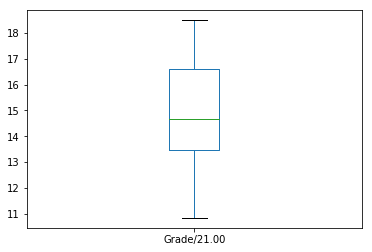

In [199]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

In [201]:
def Q9_function(file):
    
    Data = Q3_function(filenames, s = file)
    Data = Q5_function(Data)
 
    
    return(Data.shape)


# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


In [202]:
def Q10_function(df):
    df['Q.5/12.00'].replace('-', '0.00', inplace = True)
    #df.dtypes
    zeroStudent = df.loc[df["Q.5/12.00"]==0]
    zeroStudentList =[]
    for i in zeroStudent['id']:
        zeroStudentList.append(i)
    return (zeroStudentList,df.groupby('Q.5/12.00').size()[12.0])
     
# Call the function and print the results
zero, maximum = Q10_function(Q6_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [13, 18]
Number of students with maximum score : 2


In [203]:
def Q11_function():
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    # TYPE YOUR CODE HERE
    tuples = Q3_function(filenames, s = "Tuples")
    taxonomy = Q3_function(filenames, s = "Taxonomy")
    merged = pd.merge(tuples, taxonomy,on=['id','State'], how='inner')
    #merged.dtypes
    merged.columns = merged.columns.str.replace(" ","")
    merged = merged.applymap(remove_whitespace)
    merged['Total_score'] = merged[["Grade/20.00", "Grade/21.00"]].sum(axis=1)
    merged['time_x'] = 0
    merged['time_y'] = 0
    for i, temp in merged.iterrows():
        #print(temp['Timetaken'])
        x = re.search('(\d+)(mins*)(\d*)', temp['Timetaken_x'])
        mins1 = x.group(1) if x.group(1) is not None else 0
        secs1 = x.group(3) if x.group(3) is not (None or '') else 0
        
        y = re.search('(\d+)(mins*)(\d*)', temp['Timetaken_y'])
        mins2 = y.group(1) if y.group(1) is not None else 0
        secs2 = y.group(3) if y.group(3) is not (None or '') else 0
        merged.at[i,'time_x'] = pd.to_numeric(mins1)*60+pd.to_numeric(secs1)
        merged.at[i,'time_y'] = pd.to_numeric(mins2)*60+pd.to_numeric(secs2)
    return merged,merged.loc[(merged['Total_score']==merged['Total_score'].describe()['max'])]['id'].values[0]
    #pass

# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


In [204]:
def Q12_function(df):
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    # TYPE YOUR CODE HERE
    studlist=[int(temp['id']) for i, temp in df.iterrows() if (temp["time_x"]+ temp["time_y"])/60 <20]
    studlist.sort()
    return (studlist)
    
# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


In [205]:
def Q13_function(df):
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    # TYPE YOUR CODE HERE
    temp=df[df.id.notnull()]
    temp['discreteGrade/45.00'] = pd.cut(temp['Grade/45.00'], 5) 
    x = temp.groupby(['discreteGrade/45.00'])
    binlist=[]
    countlist=[]
    for i in x:
        binlist.append((i[1]['id'].values).tolist())
    for i in x:
        countlist.append(len(i))
    newdf=pd.DataFrame(columns=['bin','count'])
    newdf['bin']=binlist
    newdf['count']=countlist
    return(newdf['bin'])

# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

0           [15, 16, 17, 18]
1               [12, 13, 14]
2    [5, 6, 7, 8, 9, 10, 11]
3                     [3, 4]
4                  [0, 1, 2]
Name: bin, dtype: object


In [230]:
import unittest

class TestNotebook(unittest.TestCase):


    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])

        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
        
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        self.assertEqual(ans, result)

        
    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)
        
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = [temp.iloc[x] for x in range(len(temp))]
        
        for x in range(len(ans)):
            self.assertEqual(sum(result[x]), sum(ans[x]))
    
    def test_Q01_function(self):
        flag = True
        ans=['Python-QUIZ Coercion (6 min.)-grades.xlsx', 'Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'Python-QUIZ Functions (18 min.)-grades.xlsx', 'Python-QUIZ Iterations (6 min.)-grades.xlsx', 'Python-QUIZ Lists (10 min.)-grades.xlsx', 'Python-QUIZ Sets (7 min)-grades.xlsx', 'Python-QUIZ Strings (5 min.)-grades.xlsx', 'Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'Python-QUIZ Tuples (10 min.)-grades.xlsx']
        result = Q1_function()
        for f in ans:
            if f not in result:
                flag = False
                break
        self.assertEqual(flag,True)
    
    def test_Q03_function(self):
        ans=['Coercion', 'Conditionals', 'Dictionaries', 'Exceptions', 'Functions', 'Iterations', 'Lists', 'Sets', 'Strings', 'Taxonomy', 'Tuples']
        df = Q3_function(filenames, s = "Exceptions")
        x = True
        for file in ans:
            df = Q3_function(filenames, s = file)
            if df is None:
                x = False
                break
        self.assertEqual(x, True)

    def test_Q05_function(self):
        Time = {'Time taken':['2 mins 3 secs','20 mins 34 secs']}
        ans = [123,1234]
        df = pd.DataFrame(data=Time)
        result = Q5_function(df)
        flag = True
        for i,temp in result.iterrows():
            if ans[i] != temp['time']:
                flag = False
                break            
        self.assertEqual(flag,True)
        
    def test_Q06_function(self):
        num = {'Grade/45.00':['1','2','-','4'],'Q.1/5.00':['0','0','0','0'],'Q.2/10.00':['0','0','0','0'],'Q.3/6.00':['0','0','0','0'],'Q.4/6.00':['0','0','0','0'],'Q.5/12.00':['0','0','0','0'],'Q.6/6.00':['0','0','0','0']}
        df = pd.DataFrame(data=num)
        ans = [1.00,2.00,2.33,4.00]
        result = Q6_function(df).round(2)
        flag = True
        for i,temp in result.iterrows():
            #print(i,temp['Grade/45.00'],ans[i])
            if ans[i] != temp['Grade/45.00'].astype(float).round((2)):
                flag = False
                break            
        self.assertEqual(flag,True)        
    
    def test_Q09_function(self):   
        r,c = Q9_function (file='Strings')
        self.assertEqual(r,17)
        self.assertEqual(c,7)
        
    def test_Q10_function(self):
        result = [13, 18]
        for i in range(len(result)):
            self.assertEqual(zero[i],result[i])
        self.assertEqual(maximum,2)
        
    def test_Q11_function(self):
        df,maxval = Q11_function()
        self.assertEqual(maxval,10)
               
        

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... C:\Users\Public\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\Public\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\Public\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... ok
test_Q06_function (__mai